## When to standardize

When it is appropriate to standardize your data, which of these scenarios is NOT a reason to standardize?

### Answer the question

**Possible Answers**

- [ ] A column you want to use for modeling has extremely high variance.
- [ ] You have a dataset with several continuous columns on different scales, and you'd like to use a linear model to train the data.
- [ ] The models you're working with use some sort of distance metric in a linear space.
- [ ] Your dataset is comprised of categorical data.


To determine which scenario is NOT a reason to standardize your data, let's analyze each option:

1. **A column you want to use for modeling has extremely high variance.**
   - High variance can affect the performance of some models, but standardizing isn't always necessary just for high variance. Standardizing typically involves scaling the data so that each feature has a mean of 0 and a standard deviation of 1. This is more relevant when comparing features or when the model assumptions require it.

2. **You have a dataset with several continuous columns on different scales, and you'd like to use a linear model to train the data.**
   - Linear models can benefit from standardizing features on different scales. This ensures that each feature contributes equally to the result, avoiding bias towards features with larger scales.

3. **The models you're working with use some sort of distance metric in a linear space.**
   - Models that rely on distance metrics (e.g., KNN, clustering algorithms) are sensitive to the scale of data. Standardizing ensures that each feature contributes equally to the distance calculation.

4. **Your dataset is comprised of categorical data.**
   - Standardizing is not relevant for categorical data. Categorical data needs to be encoded differently (e.g., one-hot encoding) rather than standardized.

**Conclusion:**
The correct answer is:
**4. Your dataset is comprised of categorical data.**

Standardizing is not appropriate for categorical data because standardization applies to continuous numerical data, not categories.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
wine=pd.read_csv("wine.csv")

In [ ]:
ufo=pd.read_csv("ufo.csv")

# Modeling without normalizing


In [ ]:
X= wine[["Proline",  "Total phenols",   "Hue",  "Nonflavanoid phenols"]]
y=wine["Type"]
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

knn = KNeighborsClassifier()

# Fit the knn model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test,y_test))

0.6888888888888889


#### Check the variance of the columns in the wine dataset. Out of the four columns listed, which column is the most appropriate candidate for normalization?

In [ ]:
wine.var()

Type                                0.600679
Alcohol                             0.659062
Malic acid                          1.248015
Ash                                 0.075265
Alcalinity of ash                  11.152686
Magnesium                         203.989335
Total phenols                       0.391690
Flavanoids                          0.997719
Nonflavanoid phenols                0.015489
Proanthocyanins                     0.327595
Color intensity                     5.374449
Hue                                 0.052245
OD280/OD315 of diluted wines        0.504086
Proline                         99166.717355
dtype: float64

# Log normalization in Python

In [ ]:
# Print out the variance of the Proline column
print(wine["Proline"].var())

# Apply the log normaliza["tion function to the Proline column
wine["Proline_log"] = np.log(wine["Proline"])

# Check the variance of the normalized Proline column
print(wine["Proline_log"].var())

99166.71735542436
0.17231366191842012


# Scaling data - investigating columns

You want to use the **Ash, Alcalinity of ash, and Magnesium columns** in the wine dataset to train a linear model, but it's possible that these columns are all measured in different ways, which would bias a linear model.

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Subset the DataFrame you want to scale 
wine_subset = wine[["Ash", "Alcalinity of ash", "Magnesium"]]

# Apply the scaler to wine_subset
wine_subset_scaled = scaler.fit_transform(wine_subset)

# Standardized data and modeling

### KNN on non-scaled data

In [ ]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Fit the k-nearest neighbors model to the training data
knn=knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.6888888888888889


### KNN on scaled data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Instantiate a StandardScaler
scaler = StandardScaler()

# Scale the training and test features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the k-nearest neighbors model to the training data
knn=knn.fit(X_train_scaled, y_train)

# Score the model on the test data
print(knn.score(X_test_scaled, y_test))

0.9333333333333333


# Extracting datetime components

In [ ]:
volunteer= pd.read_csv("volunteer.csv")
volunteer.head()

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5022,37237,500,0,Fight global hunger and support women farmers ...,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,Strengthening Communities,...,March 31 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5055,37425,15,0,Stop 'N' Swap,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,Environment,...,February 05 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer["start_date_date"])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].dt.month

# Take a look at the converted and new month columns
print(volunteer[["start_date_converted", "start_date_month"]].head())

  start_date_converted  start_date_month
0           2011-07-30                 7
1           2011-02-01                 2
2           2011-01-29                 1
3           2011-02-14                 2
4           2011-02-05                 2


# Engineering text features


In [ ]:
hiking=pd.read_json("hiking.json")
hiking.head()

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


In [ ]:

hiking.isnull().sum()

Prop_ID            0
Name               0
Location           0
Park_Name          0
Length             4
Difficulty         6
Other_Details      2
Accessible         0
Limited_Access     0
lat               33
lon               33
dtype: int64

In [ ]:
hiking = hiking.dropna(subset=['Length'])

hiking.isnull().sum()

Prop_ID            0
Name               0
Location           0
Park_Name          0
Length             0
Difficulty         3
Other_Details      2
Accessible         0
Limited_Access     0
lat               29
lon               29
dtype: int64

# Extracting string patterns

-   Search the text in the length argument for numbers and decimals using an appropriate pattern.
-   Extract the matched pattern and convert it to a float.
-   Apply the return_mileage() function to each row in the hiking["Length"] column.

In [ ]:
# Write a pattern to extract numbers and decimals
def return_mileage(length):
    
    # Search the text for matches
    mile = re.____(____, ____)
    
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return float(____)
        
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = ____.apply(____)
print(hiking[["Length", "Length_num"]].head())

NameError: name '____' is not defined

In [ ]:
## If missing data present as it is

# # Write a pattern to extract numbers and decimals
# def return_mileage(length):
#     if length is None:
#         return None  # Handle None values
#     # Search the text for matches
#     mile = re.search(r"\d+(\.\d+)?", length)  # Updated regex to match integers and decimals
#     #The regex pattern \d+(\.\d+)? is used to match both integer numbers (e.g., "1") and 
#     # decimal numbers (e.g., "1.5"). The (\.\d+)? part makes the decimal portion optional.
    
#     # If a value is returned, use group(0) to return the found value
#     if mile is not None:
#         return float(mile.group(0))
#     return None  # Return None if no match is found

# # Apply the function to the Length column and take a look at both columns
# hiking["Length_num"] = hiking["Length"].apply(return_mileage)
# print(hiking[["Length", "Length_num"]].head())

       Length  Length_num
0   0.8 miles        0.80
1    1.0 mile        1.00
2  0.75 miles        0.75
3   0.5 miles        0.50
4   0.5 miles        0.50


# Vectorizing text

In [ ]:
volunteer.isna().sum()

opportunity_id            0
content_id                0
vol_requests              0
event_time                0
title                     0
hits                      0
summary                   0
is_priority             603
category_id              48
category_desc            48
amsl                    665
amsl_unit               665
org_title                 0
org_content_id            0
addresses_count           0
locality                 70
region                    0
postalcode                6
primary_loc             665
display_url               0
recurrence_type           0
hours                     0
created_date              0
last_modified_date        0
start_date_date           0
end_date_date             0
status                    0
Latitude                665
Longitude               665
Community Board         665
Community Council       665
Census Tract            665
BIN                     665
BBL                     665
NTA                     665
start_date_converted

In [ ]:
volunteer = volunteer.dropna(subset=['category_desc'])

volunteer.isnull().sum()

opportunity_id            0
content_id                0
vol_requests              0
event_time                0
title                     0
hits                      0
summary                   0
is_priority             555
category_id               0
category_desc             0
amsl                    617
amsl_unit               617
org_title                 0
org_content_id            0
addresses_count           0
locality                 65
region                    0
postalcode                5
primary_loc             617
display_url               0
recurrence_type           0
hours                     0
created_date              0
last_modified_date        0
start_date_date           0
end_date_date             0
status                    0
Latitude                617
Longitude               617
Community Board         617
Community Council       617
Census Tract            617
BIN                     617
BBL                     617
NTA                     617
start_date_converted

In [ ]:
# Take the title text
title_text = volunteer["title"]

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(title_text)

# Text classification using tf/idf vectors


Split the text_tfidf vector and y target variable into training and test sets, setting the stratify parameter equal to y, since the class distribution is uneven. Notice that we have to run the .toarray() method on the tf/idf vector, in order to get in it the proper format for scikit-learn.
Fit the X_train and y_train data to the Naive Bayes model, nb.
Print out the test set accuracy.

In [ ]:
volunteer["category_desc"].isnull().sum()

0

opportunity_id            0
content_id                0
vol_requests              0
event_time                0
title                     0
hits                      0
summary                   0
is_priority             555
category_id               0
category_desc             0
amsl                    617
amsl_unit               617
org_title                 0
org_content_id            0
addresses_count           0
locality                 65
region                    0
postalcode                5
primary_loc             617
display_url               0
recurrence_type           0
hours                     0
created_date              0
last_modified_date        0
start_date_date           0
end_date_date             0
status                    0
Latitude                617
Longitude               617
Community Board         617
Community Council       617
Census Tract            617
BIN                     617
BBL                     617
NTA                     617
start_date_converted

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Split the dataset according to the class distribution of category_desc

y = volunteer["category_desc"]
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y, random_state=42)


# Initialize the Naive Bayes classifier
nb = MultinomialNB()


# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))

0.5548387096774193


>   Accuracy is not good. Now we will work on feature selection to improve model performance

### Selecting relevant features

In [ ]:
# Create a list of redundant column names to drop
to_drop = ["category_desc", "created_date", "locality", "region", "vol_requests"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of volunteer_subset
print(volunteer_subset.head())

   opportunity_id  content_id  event_time  \
1            5008       37036           0   
2            5016       37143           0   
3            5022       37237           0   
4            5055       37425           0   
5            5056       37426           0   

                                               title  hits  \
1                                       Web designer    22   
2      Urban Adventures - Ice Skating at Lasker Rink    62   
3  Fight global hunger and support women farmers ...    14   
4                                      Stop 'N' Swap    31   
5                               Queens Stop 'N' Swap   135   

                                             summary is_priority  category_id  \
1             Build a website for an Afghan business         NaN          1.0   
2  Please join us and the students from Mott Hall...         NaN          1.0   
3  The Oxfam Action Corps is a group of dedicated...         NaN          1.0   
4  Stop 'N' Swap reduces NYC's w

### Checking for correlated features

In [ ]:
# Print out the column correlations of the wine dataset
print(wine.corr())

# Drop that column from the DataFrame
wine = wine.drop("Flavanoids", axis=1)

print(wine.head())

                                  Type   Alcohol  Malic acid       Ash  \
Type                          1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230

## Exploring text vectors, part 1

In [ ]:
import pandas as pd
import numpy as np

def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    # Extract the indices and data from the vector at the specified index
    indices = vector[vector_index].indices
    data = vector[vector_index].data
    
    # Zip indices with their corresponding data values
    zipped = dict(zip(indices, data))
    
    # Transform that zipped dict into a series
    zipped_series = pd.Series(zipped)
    
    # Sort the series to pull out the top n weighted words
    zipped_series_sorted = zipped_series.sort_values(ascending=False)[:top_n]
    
    # Debugging print statements
    print(f"Vector indices for vector_index {vector_index}: {indices}")
    print(f"Data for vector_index {vector_index}: {data}")
    print(f"Zipped series: {zipped_series}")
    print(f"Top {top_n} weighted words indices: {zipped_series_sorted.index}")
    
    # Return the original vocabulary terms corresponding to the top indices
    return [original_vocab[idx] for idx in zipped_series_sorted.index]

# Use get_feature_names_out() to get the feature names
vocab = {v: k for k, v in tfidf_vec.vocabulary_.items()}
original_vocab = np.array(tfidf_vec.get_feature_names_out())

# Print out the weighted words
weighted_words = return_weights(vocab, original_vocab, text_tfidf, 8, 3)
print(weighted_words)


Vector indices for vector_index 8: [411 720 468 190 946 500]
Data for vector_index 8: [0.33170364 0.27039563 0.37250763 0.68487299 0.39637644 0.2278852 ]
Zipped series: 411    0.331704
720    0.270396
468    0.372508
190    0.684873
946    0.396376
500    0.227885
dtype: float64
Top 3 weighted words indices: Index([190, 946, 468], dtype='int32')
['children', 'supervise', 'highland']


In [ ]:
# Define the return_weights function
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    # Extract the indices and data from the vector at the specified index
    indices = vector[vector_index].indices
    data = vector[vector_index].data
    
    # Zip indices with their corresponding data values
    zipped = dict(zip(indices, data))
    
    # Transform that zipped dict into a series
    zipped_series = pd.Series(zipped)
    
    # Sort the series to pull out the top n weighted words
    zipped_series_sorted = zipped_series.sort_values(ascending=False)[:top_n]
    
    # Debugging print statements
    print(f"Vector indices for vector_index {vector_index}: {indices}")
    print(f"Data for vector_index {vector_index}: {data}")
    print(f"Zipped series: {zipped_series}")
    print(f"Top {top_n} weighted words indices: {zipped_series_sorted.index}")
    
    # Return the original vocabulary terms corresponding to the top indices
    return [idx for idx in zipped_series_sorted.index]

# Use get_feature_names_out() to get the feature names
vocab = tfidf_vec.vocabulary_
original_vocab = np.array(tfidf_vec.get_feature_names_out())

# Define the words_to_filter function
def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
        # Call the return_weights function and extend filter_list
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
        
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)

# Call the function to get the list of word indices
filtered_word_indices = words_to_filter(vocab, original_vocab, text_tfidf, 3)

# Debugging print statements
print(f"Filtered word indices: {filtered_word_indices}")

# Filter the columns in text_tfidf to only those in filtered_word_indices
filtered_text = text_tfidf[:, list(filtered_word_indices)]

# Verify the shape of the filtered text
print("Shape of filtered text:", filtered_text.shape)

Vector indices for vector_index 0: [ 280 1052]
Data for vector_index 0: [0.68213801 0.73122345]
Zipped series: 280     0.682138
1052    0.731223
dtype: float64
Top 3 weighted words indices: Index([1052, 280], dtype='int32')
Vector indices for vector_index 1: [ 835  562   90  893  492   38 1021]
Data for vector_index 1: [0.40891285 0.40891285 0.2211952  0.36681832 0.38428913 0.40891285
 0.40891285]
Zipped series: 835     0.408913
562     0.408913
90      0.221195
893     0.366818
492     0.384289
38      0.408913
1021    0.408913
dtype: float64
Top 3 weighted words indices: Index([835, 562, 38], dtype='int32')
Vector indices for vector_index 2: [ 683  500  242   27  711  973  538  358 1065  948   68  489  425  370]
Data for vector_index 2: [0.20380137 0.17806074 0.30971332 0.30971332 0.30971332 0.16859217
 0.26756672 0.30971332 0.27783065 0.22729781 0.16258404 0.30971332
 0.30971332 0.30971332]
Zipped series: 683     0.203801
500     0.178061
242     0.309713
27      0.309713
711     0.

In [ ]:
# Split the dataset according to the class distribution of category_desc
X_train, X_test, y_train, y_test = train_test_split(filtered_text.toarray(), y, stratify=y, random_state=42)

# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))

0.5548387096774193


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB

# # Assuming volunteer dataframe is already available

# # Take the title text
# title_text = volunteer["title"]

# # Create the vectorizer method
# tfidf_vec = TfidfVectorizer()

# # Transform the text into tf-idf vectors
# text_tfidf = tfidf_vec.fit_transform(title_text)

# # Drop NaNs in category_desc and align with text_tfidf
# volunteer = volunteer.dropna(subset=['category_desc'])
# y = volunteer["category_desc"]

# # Check for NaNs in the volunteer dataframe after dropping
# print("NaNs in volunteer dataframe:", volunteer.isnull().sum())

# # Split the dataset according to the class distribution of category_desc
# X_train, X_test, y_train, y_test = train_test_split(text_tfidf, y, stratify=y, random_state=42)

# # Initialize the Naive Bayes classifier
# nb = MultinomialNB()

# # Fit the model to the training data
# nb.fit(X_train, y_train)

# # Print out the model's accuracy
# print("Accuracy:", nb.score(X_test, y_test))

# # Define the return_weights function
# def return_weights(vocab, original_vocab, vector, vector_index, top_n):
#     # Extract the indices and data from the vector at the specified index
#     indices = vector[vector_index].indices
#     data = vector[vector_index].data
    
#     # Zip indices with their corresponding data values
#     zipped = dict(zip(indices, data))
    
#     # Transform that zipped dict into a series
#     zipped_series = pd.Series(zipped)
    
#     # Sort the series to pull out the top n weighted words
#     zipped_series_sorted = zipped_series.sort_values(ascending=False)[:top_n]
    
#     # Debugging print statements
#     print(f"Vector indices for vector_index {vector_index}: {indices}")
#     print(f"Data for vector_index {vector_index}: {data}")
#     print(f"Zipped series: {zipped_series}")
#     print(f"Top {top_n} weighted words indices: {zipped_series_sorted.index}")
    
#     # Return the original vocabulary terms corresponding to the top indices
#     return [original_vocab[idx] for idx in zipped_series_sorted.index]

# # Use get_feature_names_out() to get the feature names
# vocab = tfidf_vec.vocabulary_
# original_vocab = np.array(tfidf_vec.get_feature_names_out())

# # Print out the weighted words
# weighted_words = return_weights(vocab, original_vocab, text_tfidf, 8, 3)
# print(weighted_words)


NaNs in volunteer dataframe: opportunity_id            0
content_id                0
vol_requests              0
event_time                0
title                     0
hits                      0
summary                   0
is_priority             555
category_id               0
category_desc             0
amsl                    617
amsl_unit               617
org_title                 0
org_content_id            0
addresses_count           0
locality                 65
region                    0
postalcode                5
primary_loc             617
display_url               0
recurrence_type           0
hours                     0
created_date              0
last_modified_date        0
start_date_date           0
end_date_date             0
status                    0
Latitude                617
Longitude               617
Community Board         617
Community Council       617
Census Tract            617
BIN                     617
BBL                     617
NTA                

# PCA

In [ ]:
from sklearn.decomposition import PCA
# Instantiate a PCA object
pca = PCA()

# Define the features and labels from the wine dataset
X = wine.drop("Type", axis=1)
y = wine["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply PCA to the wine dataset X vector
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)


# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

[9.97802288e-01 2.02071651e-03 9.82347993e-05 5.54019611e-05
 1.10408259e-05 5.87484562e-06 3.13893813e-06 1.54438959e-06
 1.03141481e-06 3.91189147e-07 1.96993158e-07 9.16013156e-08
 4.88903890e-08]


In [ ]:
# Fit knn to the training data
knn.fit(pca_X_train, y_train)

# Score knn on the test data and print it out
knn.score(pca_X_test, y_test)

0.7777777777777778

# UFO - Putting all together

In [ ]:
ufo.shape

(4935, 11)

In [ ]:
# Checking column types
# Print the DataFrame info
print(ufo.info())

# Change the type of seconds to float
ufo["seconds"] = ufo["seconds"].astype(float)

# Change the date column to type datetime
ufo["date"] = pd.to_datetime(ufo["date"])

# Check the column types
print("_"*24,"\n","_"*25)
print(ufo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4935 non-null   object 
 1   city            4926 non-null   object 
 2   state           4516 non-null   object 
 3   country         4255 non-null   object 
 4   type            4776 non-null   object 
 5   seconds         4935 non-null   float64
 6   length_of_time  4792 non-null   object 
 7   desc            4932 non-null   object 
 8   recorded        4935 non-null   object 
 9   lat             4935 non-null   object 
 10  long            4935 non-null   float64
dtypes: float64(2), object(9)
memory usage: 424.2+ KB
None
________________________ 
 _________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  

In [ ]:
# Count the missing values in the length_of_time, state, and type columns, in that order
print(ufo[["length_of_time", "state", "type"]].isna().sum())

# Drop rows where length_of_time, state, or type are missing

# ufo_no_missing = ufo.dropna(subset=["length_of_time", "state", "type"])
ufo.dropna(subset=["length_of_time", "state", "type"], inplace=True)
# Print out the shape of the new dataset
print(ufo.shape)

length_of_time    143
state             419
type              159
dtype: int64
(4283, 11)


In [ ]:
import re

In [ ]:
def return_minutes(time_string):

    # Search for numbers in time_string
    num = re.search("\\d+", time_string)
    if num is not None:
        return int(num.group(0))
        
# Apply the extraction to the length_of_time column
ufo["minutes"] = ufo["length_of_time"].apply(return_minutes)

# Take a look at the head of both of the columns
print(ufo[["length_of_time", "minutes"]].head())

    length_of_time  minutes
0          2 weeks      2.0
1           30sec.     30.0
3  about 5 minutes      5.0
4                2      2.0
5       10 minutes     10.0


In [ ]:
print(ufo.isna().sum())

date                0
city                0
state               0
country           392
type                0
seconds             0
length_of_time      0
desc                0
recorded            0
lat                 0
long                0
minutes           303
dtype: int64


In [ ]:
ufo.dtypes

date              datetime64[ns]
city                      object
state                     object
country                   object
type                      object
seconds                  float64
length_of_time            object
desc                      object
recorded                  object
lat                       object
long                     float64
minutes                  float64
dtype: object

In [ ]:
# Fill missing values with mean in the "minutes" column
ufo["minutes"].fillna(ufo["minutes"].mean(), inplace=True)

In [ ]:
print(ufo.isna().sum())

date                0
city                0
state               0
country           392
type                0
seconds             0
length_of_time      0
desc                0
recorded            0
lat                 0
long                0
minutes             0
dtype: int64


In [ ]:
ufo.dtypes

date              datetime64[ns]
city                      object
state                     object
country                   object
type                      object
seconds                  float64
length_of_time            object
desc                      object
recorded                  object
lat                       object
long                     float64
minutes                  float64
dtype: object

In [ ]:
# print(ufo["seconds_log"].unique())

In [ ]:
# Assign small positive value (introduces bias)
ufo["seconds"] = np.where(ufo["seconds"] <= 0, 1e-6, ufo["seconds"])


# Check the variance of the seconds and minutes columns
print(ufo[["seconds", "minutes"]].var())

# Log normalize the seconds column
ufo["seconds_log"] = np.log(ufo["seconds"])

# Print out the variance of just the seconds_log column
print(ufo["seconds_log"].var())

# Assign small positive value (introduces bias)
ufo["minutes"] = np.where(ufo["minutes"] <= 0, 1e-6, ufo["minutes"])

# Log normalize the seconds column
ufo["min_log"] = np.log(ufo["minutes"])

# Print out the variance of just the seconds_log column
print(ufo["min_log"].var())


seconds    1.545212e+10
minutes    8.524547e+02
dtype: float64
19.367145170518295
2.014485618049915


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'seconds'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'minutes'}>],
       [<Axes: title={'center': 'seconds_log'}>,
        <Axes: title={'center': 'min_log'}>]], dtype=object)

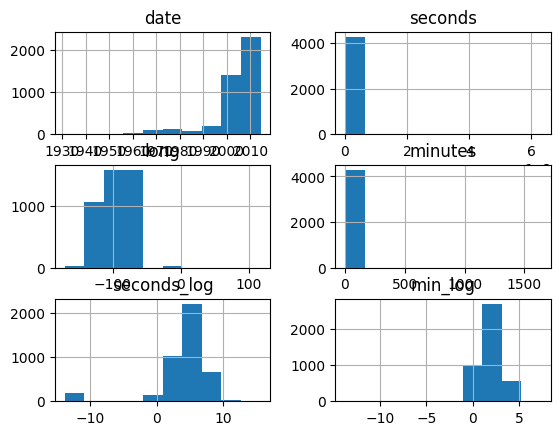

In [ ]:
ufo.hist()

In [ ]:
for col in ufo.columns:
  # Check if the column is numeric (optional)
  if not pd.api.types.is_numeric_dtype(ufo[col]):
    continue  # Skip non-numeric columns

  variance = ufo[col].var()
  print(f"Variance of column '{col}': {variance}")


Variance of column 'seconds': 15452116479.15846
Variance of column 'long': 411.9750549212594
Variance of column 'minutes': 852.4546681169846
Variance of column 'seconds_log': 19.367145170518295
Variance of column 'min_log': 2.014485618049915


In [ ]:
# Use pandas to encode us values as 1 and others as 0
ufo["country_enc"] = ufo["country"].apply(lambda val:1 if val=="us" else 0 )

# Print the number of unique type values
print(len(ufo["type"].unique()))

# Create a one-hot encoded set of the type values
type_set = pd.get_dummies(ufo["type"])

# Concatenate this set back to the ufo DataFrame
ufo = pd.concat([ufo, type_set], axis=1)

21


In [ ]:
# Look at the first 5 rows of the date column
print(ufo["date"].head())

# Extract the month from the date column
ufo["month"] = ufo["date"].dt.month

# Extract the year from the date column
ufo["year"] = ufo["date"].dt.year

# Take a look at the head of all three columns
print(ufo[["date","month","year"]])

0   2011-11-03 19:21:00
1   2004-10-03 19:05:00
3   2002-11-21 05:45:00
4   2010-08-19 12:55:00
5   2012-06-16 23:00:00
Name: date, dtype: datetime64[ns]
                    date  month  year
0    2011-11-03 19:21:00     11  2011
1    2004-10-03 19:05:00     10  2004
3    2002-11-21 05:45:00     11  2002
4    2010-08-19 12:55:00      8  2010
5    2012-06-16 23:00:00      6  2012
...                  ...    ...   ...
4930 2000-07-05 19:30:00      7  2000
4931 2008-03-18 22:00:00      3  2008
4932 2005-06-15 02:30:00      6  2005
4933 1991-11-01 03:00:00     11  1991
4934 2005-12-10 18:00:00     12  2005

[4283 rows x 3 columns]


In [ ]:
# Take a look at the head of the desc field
print(ufo["desc"].head())

# Instantiate the tfidf vectorizer object
vec = TfidfVectorizer()

# Fit and transform desc using vec
desc_tfidf = vec.fit_transform(ufo["desc"])

# Look at the number of columns and rows
print(desc_tfidf.shape)

0    Red blinking objects similar to airplanes or s...
1                 Many fighter jets flying towards UFO
3    It was a large&#44 triangular shaped flying ob...
4       A white spinning disc in the shape of an oval.
5    Dancing lights that would fly around and then ...
Name: desc, dtype: object
(4283, 5754)


In [ ]:
# Make a list of features to drop
to_drop = ["city", "country", "lat", "long", "state", "date", "recorded", "seconds", "minutes", "desc", "length_of_time"]

# Drop those features

ufo_dropped = ufo.drop(to_drop, axis=1)

# # Add in the rest of the arguments
# def return_weights(vocab, original_vocab, vector, vector_index, top_n):
#     zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
#     # Transform that zipped dict into a series
#     zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
#     # Sort the series to pull out the top n weighted words
#     zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
#     return [original_vocab[i] for i in zipped_index]

# Print out the weighted words
print(return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, 8, 3))

def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
    
        # Call the return_weights function and extend filter_list
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
        
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)

# Let's also filter some words out of the text vector we created
filtered_words = words_to_filter(vocab, vec.vocabulary_, desc_tfidf, 4)

NameError: name 'return_weights' is not defined